# **Project Title :Reviewing customers past and on that Predict potential customrs who can buy our service.**

# **Problem Discription**

we hav large number of customers. our salse team would liketo call potential customers who can buy our service. We don't have enough manpower and time to call reach every customer and convince them for our products. Also we need to rank customers so that we could offer them our product and services with discounted price. 

# **You are given following information**


* InvoiceNo	
* StockCode	
* Description	
* Quantity	
* InvoiceDate	
* UnitPrice	
* CustomerID	
* Country

# **Work Flow**

* Customer segmentation.
* Find Potential Vs Non Potential Customers.
* Who Can Buy Our Services In Current Month. Prediction (Predicted Sales For Future).

* Customer Lifetime Value (cltv) --Live vs Dead Customers.--Recency , Frequency , Monetary Analysis.

* Cohort Analysis.

* Lifetime Pacakage -- 

  



# **1.Lets Invite Some Libraries.**

In [ ]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re # for regular expressions
import pandas as pd 

In [ ]:
#Lets inport data

data = pd.read_excel('/content/drive/MyDrive/Data Science Files/Copy of Online Retail.xlsx')

# 2. Reviewing Our Data

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
#checking info of our dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
#there are 541909 rows and 8 columns in our dataset
data.shape


(541909, 8)

In [ ]:
# Names Of columns in our dataset
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
#most of order are in year 2011
data.InvoiceDate.value_counts()


2011-10-31 14:41:00    1114
2011-12-08 09:28:00     749
2011-12-09 10:03:00     731
2011-12-05 17:24:00     721
2011-06-29 15:58:00     705
                       ... 
2011-09-28 09:57:00       1
2011-09-28 09:45:00       1
2011-03-16 12:13:00       1
2011-03-16 12:22:00       1
2011-03-16 15:58:00       1
Name: InvoiceDate, Length: 23260, dtype: int64

In [ ]:
#there are unique 4372 customers from we get order 
data.CustomerID.value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: CustomerID, Length: 4372, dtype: int64

# 3. Dealing with negative values in Quantity column in Dataset

In [ ]:
#there are some values in Quantity are in negative
data.Quantity.value_counts()

 1        148227
 2         81829
 12        61063
 6         40868
 4         38484
           ...  
-472           1
-161           1
-1206          1
-272           1
-80995         1
Name: Quantity, Length: 722, dtype: int64

In [ ]:
#Dealing with negative values in Quantity
data['Quantity'] = data['Quantity'].abs()

data.sort_values('Quantity')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
270954,560601,22138,BAKING SET 9 PIECE RETROSPOT,1,2011-07-19 17:17:00,4.95,16764.0,United Kingdom
148468,549240,48138,DOORMAT UNION FLAG,1,2011-04-07 11:37:00,7.95,15910.0,United Kingdom
148469,549240,23154,SET OF 4 JAM JAR MAGNETS,1,2011-04-07 11:37:00,2.08,15910.0,United Kingdom
148470,549240,23156,SET OF 5 MINI GROCERY MAGNETS,1,2011-04-07 11:37:00,2.08,15910.0,United Kingdom
148472,549240,21199,PINK HEART CONFETTI IN TUBE,1,2011-04-07 11:37:00,1.65,15910.0,United Kingdom
...,...,...,...,...,...,...,...,...
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


# 4. Checking for null values

In [ ]:
#there are null values in Description and CustomerID column
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#checking the % of null values in our dataset
missing_values = pd.DataFrame()
missing_values['column'] = data.columns

missing_values['percent'] = [round(100* data[col].isnull().sum() / len(data), 2) for col in data.columns]
missing_values = missing_values.sort_values('percent')
missing_values = missing_values[missing_values['percent']>0]


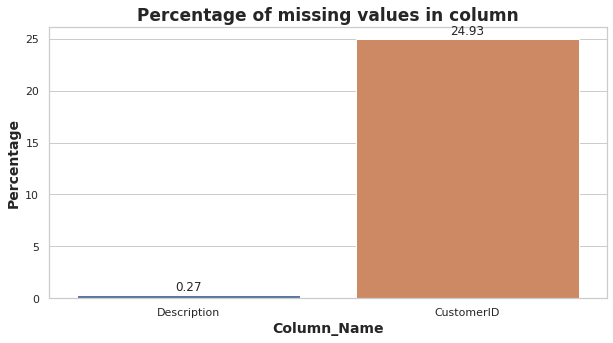

In [ ]:
plt.figure(figsize=(10, 5))
sns.set(style='whitegrid', color_codes=True)
splot=sns.barplot(x='column', y='percent', data=missing_values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.xlabel("Column_Name", size=14, weight="bold")
plt.ylabel("Percentage", size=14, weight="bold")
plt.title("Percentage of missing values in column",fontweight="bold",size=17)
plt.show()

Description column and CustomerID contains 0.27 and 24.93% null values. But Description this column is not useful for our analysis.and with out CustomerID we can not identify customer and can not offer anything Hence we will neglect these null values.

# Heat map for missing values

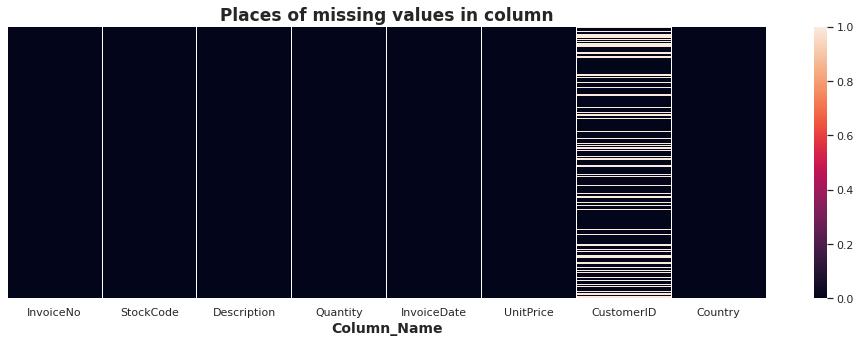

In [ ]:
plt.figure(figsize=(17, 5))
sns.heatmap(data.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

we can see the only null values in CustomerID are noticiable. but we have to drop that.

In [ ]:
#we will Drop null values
data.dropna(inplace = True)
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# **Unique Values In Each Feature Coulmn**

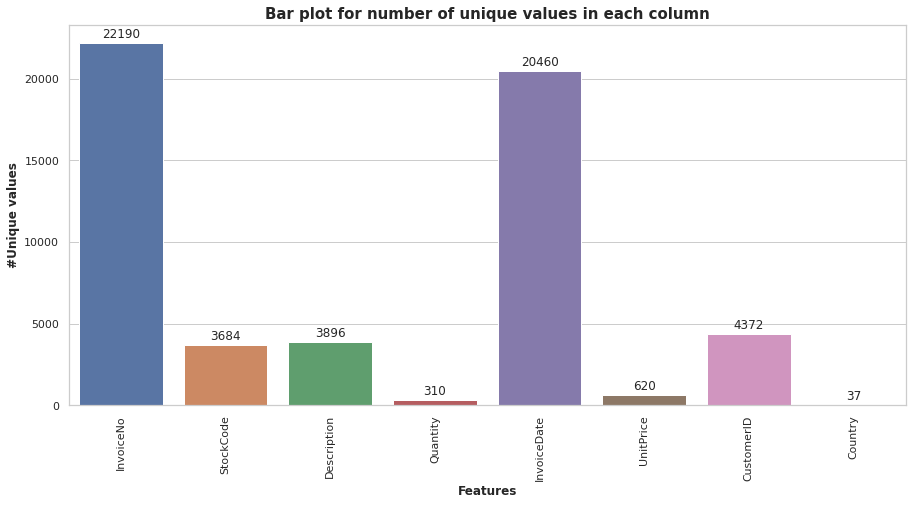

In [ ]:
unique_df = pd.DataFrame()
unique_df['Features'] = data.columns
unique=[]
for i in data.columns:
    unique.append(data[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=1)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

# Going deeper in Data

In [ ]:
#Checking range of unit price

#data.sort_values('UnitePrice', ascending=False , inplace = True )
data.sort_values("UnitPrice", axis = 0, ascending = False,
                 inplace = False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom
173277,C551685,POST,POSTAGE,1,2011-05-03 12:51:00,8142.75,16029.0,United Kingdom
173391,C551699,M,Manual,1,2011-05-03 14:12:00,6930.00,16029.0,United Kingdom
268027,C560372,M,Manual,1,2011-07-18 12:26:00,4287.63,17448.0,United Kingdom
...,...,...,...,...,...,...,...,...
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.00,16560.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.00,13081.0,United Kingdom
454463,575579,22437,SET OF 9 BLACK SKULL BALLOONS,20,2011-11-10 11:49:00,0.00,13081.0,United Kingdom
187613,553000,47566,PARTY BUNTING,4,2011-05-12 15:21:00,0.00,17667.0,United Kingdom


In [ ]:
data.sort_values("Quantity", axis = 0, ascending = False,inplace = False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
...,...,...,...,...,...,...,...,...
233061,557426,21625,VINTAGE UNION JACK APRON,1,2011-06-20 12:06:00,6.95,15016.0,United Kingdom
233060,557426,21364,PEACE SMALL WOOD LETTERS,1,2011-06-20 12:06:00,6.75,15016.0,United Kingdom
456017,575661,22573,STAR WOODEN CHRISTMAS DECORATION,1,2011-11-10 14:39:00,0.85,12617.0,France
456016,575661,23333,IVORY WICKER HEART MEDIUM,1,2011-11-10 14:39:00,1.25,12617.0,France


we can see there are some quantity showing unite price zero. unit price must not be zero so we add some minimul amount so we can consider them

In [ ]:
df = data

In [ ]:
df.sort_values("Quantity", axis = 0, ascending = False,inplace = False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
...,...,...,...,...,...,...,...,...
233061,557426,21625,VINTAGE UNION JACK APRON,1,2011-06-20 12:06:00,6.95,15016.0,United Kingdom
233060,557426,21364,PEACE SMALL WOOD LETTERS,1,2011-06-20 12:06:00,6.75,15016.0,United Kingdom
456017,575661,22573,STAR WOODEN CHRISTMAS DECORATION,1,2011-11-10 14:39:00,0.85,12617.0,France
456016,575661,23333,IVORY WICKER HEART MEDIUM,1,2011-11-10 14:39:00,1.25,12617.0,France


In [ ]:
col = data['UnitPrice']
col.replace(to_replace = 0.00, value = 0.1, inplace=True)

# we will find total puchase made by each customer

adding new coloumn in datase as total purchase amount

In [ ]:
TotalPurchaseAmount = df.Quantity * df.UnitPrice

df["Total_Revenue_Generated"] = TotalPurchaseAmount

display(df.sort_values("Total_Revenue_Generated", ascending = False))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Revenue_Generated
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.080,16446.0,United Kingdom,168469.600
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:27:00,2.080,16446.0,United Kingdom,168469.600
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.040,12346.0,United Kingdom,77183.600
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:17:00,1.040,12346.0,United Kingdom,77183.600
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.500,15098.0,United Kingdom,38970.000
...,...,...,...,...,...,...,...,...,...
500313,578757,16216,LETTER SHAPE PENCIL SHARPENER,1,2011-11-25 11:41:00,0.060,12748.0,United Kingdom,0.060
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952.0,United Kingdom,0.001
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198.0,United Kingdom,0.001
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618.0,United Kingdom,0.001


# we will see the repation of customer

In [ ]:
repeated_customers = df.CustomerID.value_counts()

In [ ]:
#see top 10 most repeated customers
repeated_customers.head(10)

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
15311.0    2491
14646.0    2085
13089.0    1857
13263.0    1677
14298.0    1640
Name: CustomerID, dtype: int64

In [ ]:
 df1 = df.groupby(['CustomerID' ]) ['Total_Revenue_Generated'].aggregate('count').reset_index().sort_values('Total_Revenue_Generated' , ascending = False)



In [ ]:
display(df1)

,CustomerID,Total_Revenue_Generated
4042,17841.0,7983
1895,14911.0,5903
1300,14096.0,5128
330,12748.0,4642
1674,14606.0,2782
...,...,...
1318,14119.0,1
1046,13747.0,1
2400,15590.0,1
2379,15562.0,1


'(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=np.mean, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, \nsaturation=0.75, errcolor=".26", errwidth=None, capsize=None, dodge=True, ax=None, **kwargs) -> Any'

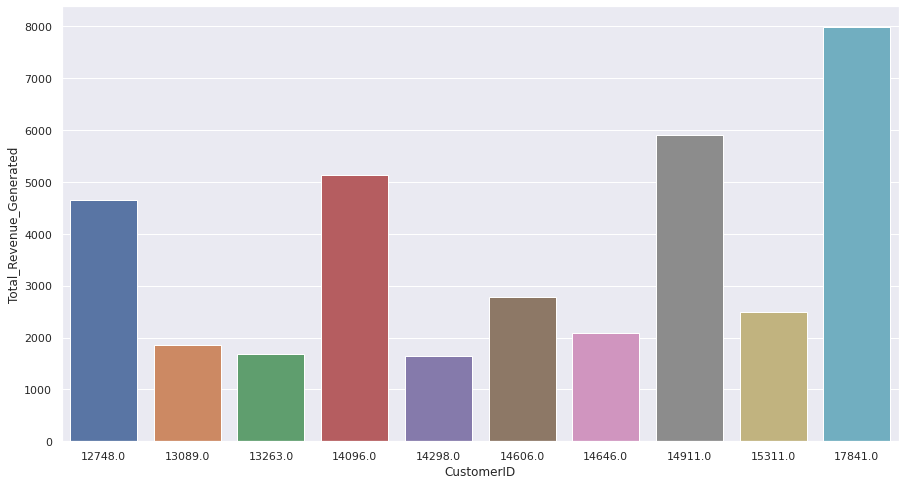

In [ ]:
# Revenue Generated top 10 customers
sns.set_style('darkgrid')
#sns.set(rc={'axes.facecolor':'ivory', 'figure.facecolor':'ivory'})
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x = 'CustomerID' , y = 'Total_Revenue_Generated' , data = df1.head(10) , ax=ax)

'''(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=np.mean, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, 
saturation=0.75, errcolor=".26", errwidth=None, capsize=None, dodge=True, ax=None, **kwargs) -> Any'''

# **Revenue Generated From Different Countries**

we can see that most of our revenue generated from uk so we can focus on uk based customers. let see how much customers we have in uk. 





In [ ]:
df1 = df.groupby(['Country'],)['Total_Revenue_Generated'].aggregate('count').reset_index().sort_values('Total_Revenue_Generated', ascending=False)

In [ ]:
df1.head()

,Country,Total_Revenue_Generated
35,United Kingdom,361878
14,Germany,9495
13,France,8491
10,EIRE,7485
30,Spain,2533


In [ ]:
df1.sort_values('Total_Revenue_Generated' , inplace = True , ascending = False)

In [ ]:
df2 = df1.head(5) 

In [ ]:
df2

,Country,Total_Revenue_Generated
35,United Kingdom,361878
14,Germany,9495
13,France,8491
10,EIRE,7485
30,Spain,2533


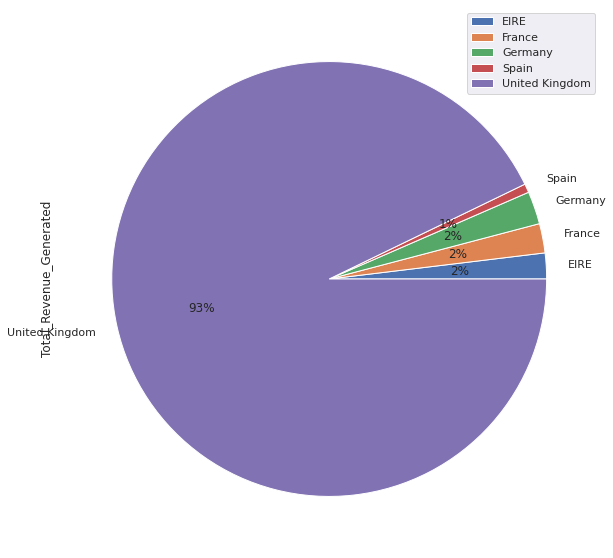

In [ ]:
# Plotting the pie chart for above dataframe

fig, ax = plt.subplots(figsize=(15,10))
df2.groupby(['Country']).sum().head().plot(kind='pie', y='Total_Revenue_Generated', autopct='%1.0f%%' , ax=ax)

As we see we get nearly 93%. here we showing top 5 counties ony if we consider all on an average we get 89% of revenue from United Kingdom. So we can use to we can give our more attention towords the united kindoms customers and also build plan to grow in different countries.  

# **Lets see how much orders we got in every month in total span**

In [ ]:
#let see our order range
# we have orders from 1st of dec 2010 to 9th dec. 2011
df['InvoiceDate'].min

<bound method NDFrame._add_numeric_operations.<locals>.min of 0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 406829, dtype: datetime64[ns]>

In [ ]:
#removing hrs:second from date
df['InvoiceDate'] = df['InvoiceDate'].dt.strftime('%d/%m/%Y')



In [ ]:
#changing into datetimeforat
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df.dtypes

InvoiceNo                          object
StockCode                          object
Description                        object
Quantity                            int64
InvoiceDate                datetime64[ns]
UnitPrice                         float64
CustomerID                        float64
Country                            object
Total_Revenue_Generated           float64
dtype: object

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Revenue_Generated
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12,3.39,17850.0,United Kingdom,20.34


In [ ]:
df['InvoiceNo'].groupby([df.InvoiceDate.dt.year]).agg('count')

InvoiceDate
2010     26850
2011    379979
Name: InvoiceNo, dtype: int64

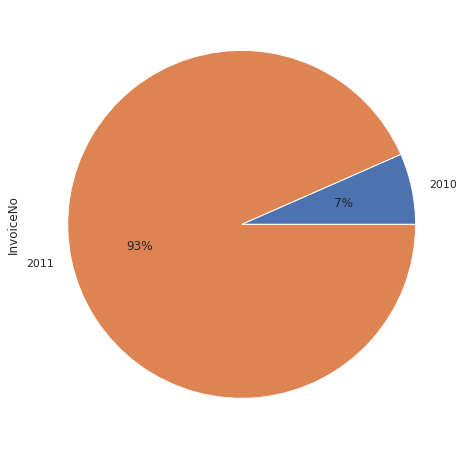

In [ ]:

#Total sales for different years
plt.figure(figsize = (10,8))
df['InvoiceNo'].groupby([df.InvoiceDate.dt.year]).agg('count').plot(kind = 'pie' , autopct='%.0f%%')

In [ ]:
#counting the orders on every every month
df1 = df.groupby([df.InvoiceDate.dt.month],)['InvoiceNo'].aggregate('count').reset_index().sort_values('InvoiceDate', ascending=False)

In [ ]:
#changing the name of columns
df1.rename(columns = {'InvoiceDate':'Month' , "InvoiceNo" : "Number_Of_Orders"}, inplace = True)
df1.head()

,Month,Number_Of_Orders
11,12,20073
10,11,55749
9,10,45288
8,9,40434
7,8,32329


In [ ]:
df1.dtypes

Month               int64
Number_Of_Orders    int64
dtype: object

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Revenue_Generated
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12,3.39,17850.0,United Kingdom,20.34


In [ ]:
#Adding year feature to the dataset
timest = df['InvoiceDate'].dt.year
df['Year'] = timest

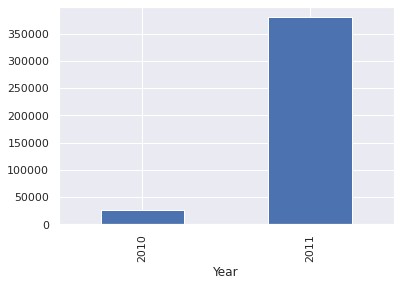

In [ ]:
#Sales for different month
df.groupby('Year')['Total_Revenue_Generated'].count().plot(kind = 'bar')



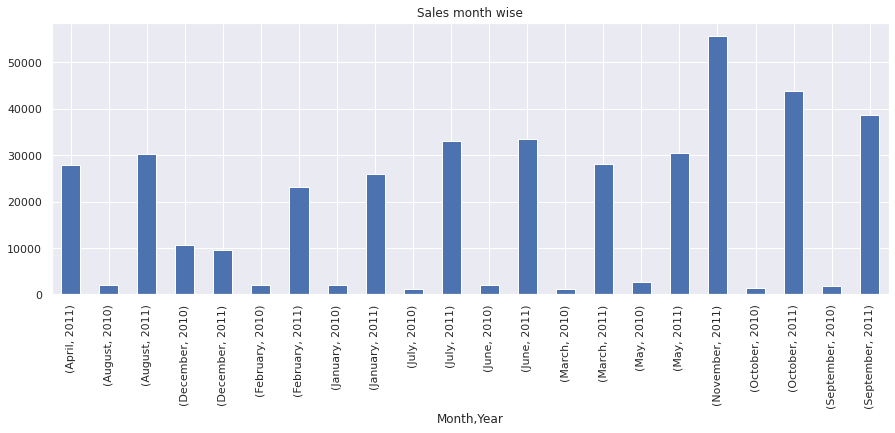

In [ ]:
plt.figure(figsize = (15,5))
df['Mon']=df['InvoiceDate'].dt.month
#df ['Year'] = df['InvoiceDate'].dt.year
df['Month']=df['InvoiceDate'].dt.month_name()
df.groupby(['Month','Year'])['Total_Revenue_Generated'].count().plot(kind = 'bar', title = 'Sales month wise')

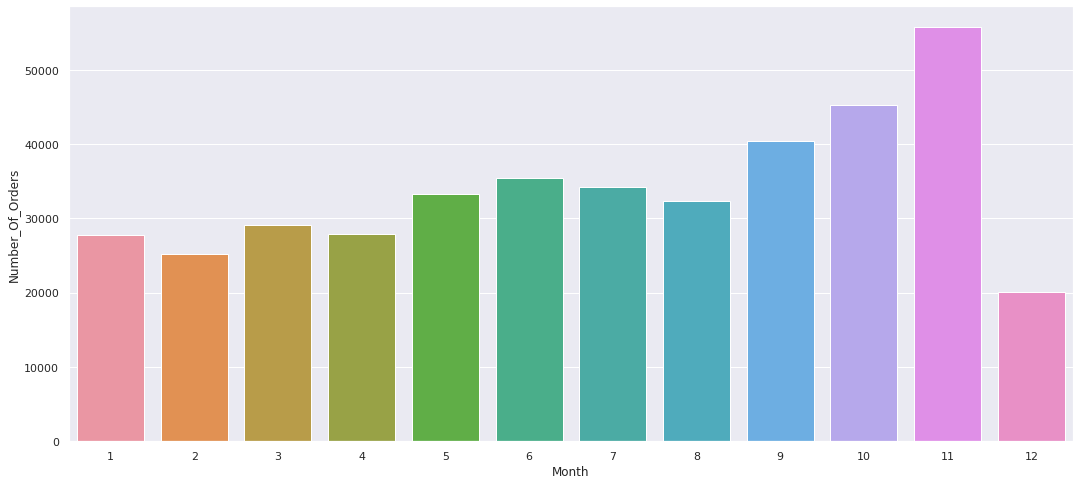

In [ ]:
#ploting the bar plot monts vs Number_of_Orders
plt.figure(figsize = (18,8))
sns.barplot(x = 'Month', y = "Number_Of_Orders" , data = df1)

In [ ]:
#counting the orders on every day
df.groupby(['InvoiceDate'],)['InvoiceNo'].aggregate('count').reset_index().sort_values('InvoiceDate', ascending=False)

,InvoiceDate,InvoiceNo
304,2011-12-10,1596
303,2011-12-09,1507
302,2011-12-08,707
301,2011-12-07,763
300,2011-12-06,1073
...,...,...
4,2010-06-12,1974
3,2010-05-12,2724
2,2010-03-12,1117
1,2010-02-12,2044


In [ ]:
# yearly count of orders
df.groupby(df.InvoiceDate.dt.year)['InvoiceNo'].aggregate('count').reset_index().sort_values('InvoiceDate', ascending = False)

,InvoiceDate,InvoiceNo
1,2011,379979
0,2010,26850


In [ ]:
df.groupby(df.InvoiceDate.dt.month)['InvoiceNo'].aggregate('count').reset_index().sort_values('InvoiceDate', ascending = False)

,InvoiceDate,InvoiceNo
11,12,20073
10,11,55749
9,10,45288
8,9,40434
7,8,32329
6,7,34223
5,6,35454
4,5,33223
3,4,27871
2,3,29174


In [ ]:
df1 = data

In [ ]:
df1['ConvertedDate'] = data['InvoiceDate'].dt.strftime('%m/%d/%Y')

In [ ]:
#counting the orders on every day
df1.groupby(['InvoiceDate'],)['InvoiceNo'].aggregate('count').reset_index().sort_values('InvoiceDate', ascending=False)

,InvoiceDate,InvoiceNo
304,2011-12-10,1596
303,2011-12-09,1507
302,2011-12-08,707
301,2011-12-07,763
300,2011-12-06,1073
...,...,...
4,2010-06-12,1974
3,2010-05-12,2724
2,2010-03-12,1117
1,2010-02-12,2044


In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Revenue_Generated,Year,Mon,Month,ConvertedDate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12,2.55,17850.0,United Kingdom,15.30,2010,1,January,01/12/2010
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12,3.39,17850.0,United Kingdom,20.34,2010,1,January,01/12/2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12,2.75,17850.0,United Kingdom,22.00,2010,1,January,01/12/2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12,3.39,17850.0,United Kingdom,20.34,2010,1,January,01/12/2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12,3.39,17850.0,United Kingdom,20.34,2010,1,January,01/12/2010


In [ ]:
df1.dtypes

InvoiceNo                          object
StockCode                          object
Description                        object
Quantity                            int64
InvoiceDate                datetime64[ns]
UnitPrice                         float64
CustomerID                        float64
Country                            object
Total_Revenue_Generated           float64
Year                                int64
Mon                                 int64
Month                              object
ConvertedDate                      object
dtype: object

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Revenue_Generated,Year,Mon,Month,ConvertedDate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12,2.55,17850.0,United Kingdom,15.30,2010,1,January,01/12/2010
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12,3.39,17850.0,United Kingdom,20.34,2010,1,January,01/12/2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12,2.75,17850.0,United Kingdom,22.00,2010,1,January,01/12/2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12,3.39,17850.0,United Kingdom,20.34,2010,1,January,01/12/2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12,3.39,17850.0,United Kingdom,20.34,2010,1,January,01/12/2010


# **What is RFM analysis?**

RFM stands for recency, frequency, monetary value. In business analytics, we often use this concept to divide customers into different segments, like high-value customers, medium value customers or low-value customers, and similarly many others.


# Recency:  How recently has the customer made a transaction with us
# Frequency: How frequent is the customer in ordering/buying some product from us
# Monetary: How much does the customer spend on purchasing products from us.

In [ ]:
df1.InvoiceDate.max()

Timestamp('2011-12-10 00:00:00')

So for recency we will take 2011–12–10 as our reference date.

In [ ]:
import datetime as dt
NOW = dt.datetime(2011,12,10)

In [ ]:
#Find the last order date in our data:
df1.InvoiceDate.max()
#So for recency we will take 2011–12–10 as our reference date.
import datetime as dt
NOW = dt.datetime(2011,12,10)

‘Now’ is a date type object; so for data processing, we will convert the InvoiceDate column into pandas date object. Next we groupby CustomerID and aggregate using lambda functions.

In [ ]:
rfmTable=df1.groupby('CustomerID').agg({'InvoiceDate':lambda x:(NOW-x.max()).days,'InvoiceNo':lambda x:len(x),'Total_Revenue_Generated':lambda x: x.sum()})
rfmTable.head()

,InvoiceDate,InvoiceNo,Total_Revenue_Generated
CustomerID,,,
12346.0,326,2,154367.20
12347.0,40,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40


In [ ]:
# changinf columns names InvoiceDate To Recency, InvoiceNo TO Frequency, Total_Revenue_Generated TO monetary_value  
rfmTable.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','Total_Revenue_Generated':'monetary_value'},inplace=True)
rfmTable.head()

,Recency,Frequency,monetary_value
CustomerID,,,
12346.0,326,2,154367.20
12347.0,40,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40


In [ ]:
#lets put these customers into bins. We will categorize each customers into quartiles — [0.25,0.5,0,75]. So 0.25 is 25th percentile, 0.5 is 50th percentile and so on.
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 102.0},
 'Recency': {0.25: 20.0, 0.5: 57.0, 0.75: 152.0},
 'monetary_value': {0.25: 308.85,
  0.5: 678.4100000000001,
  0.75: 1696.2849999999999}}

In [ ]:
df['R_rank'] = df['CustomerID'].rank(ascending=False)
df['F_rank'] = df['InvoiceNo'].rank(ascending=True)
df['M_rank'] = df['InvoiceNo'].rank(ascending=True)
 
# normalizing the rank of the customers
df['R_rank_norm'] = (df['R_rank']/df['R_rank'].max())*100
df['R_rank'] = df['CustomerID'].rank(ascending=False)
df['R_rank'] = df['CustomerID'].rank(ascending=False)
df['R_rank'] = df['CustomerID'].rank(ascending=False)

 
df['R_rank'] = df['CustomerID'].rank(ascending=False)

 
df['R_rank'] = df['CustomerID'].rank(ascending=False)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Revenue_Generated,Year,Mon,Month,ConvertedDate,R_rank,F_rank,M_rank,R_rank_norm
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12,2.55,17850.0,United Kingdom,15.30,2010,1,January,01/12/2010,23573.5,NaN,NaN,5.794456
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12,3.39,17850.0,United Kingdom,20.34,2010,1,January,01/12/2010,23573.5,NaN,NaN,5.794456
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12,2.75,17850.0,United Kingdom,22.00,2010,1,January,01/12/2010,23573.5,NaN,NaN,5.794456
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12,3.39,17850.0,United Kingdom,20.34,2010,1,January,01/12/2010,23573.5,NaN,NaN,5.794456
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12,3.39,17850.0,United Kingdom,20.34,2010,1,January,01/12/2010,23573.5,NaN,NaN,5.794456


# Calculating Monetary Value
Here we are calculating the monetary value of customer spend on purchasing products from the company.

In [ ]:
df['Total'] = df['CustomerID']*df['Quantity']
monetary_df = df.groupby(by='CustomerID', as_index=False)['Total'].sum()
monetary_df.columns = ['CustomerID', 'Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,1.832517e+09
1,12347.0,3.034893e+07
2,12348.0,2.890667e+07
3,12349.0,7.792219e+06
4,12350.0,2.432950e+06


# **Calculating Recency**
Here we are calculating recency for customers who had made a purchase with a company.

In [ ]:
df_recency = df.groupby('CustomerID',
                        as_index=False)['InvoiceDate'].max()
df_recency.columns = ['CustomerID', 'InvoiceDate']
recent_date = df_recency['InvoiceDate'].max()
df_recency['Recency'] = df_recency['InvoiceDate'].apply(
    lambda x: (recent_date - x).days)
df_recency.head()

,CustomerID,InvoiceDate,Recency
0,12346.0,2011-01-18,326
1,12347.0,2011-10-31,40
2,12348.0,2011-09-25,76
3,12349.0,2011-11-21,19
4,12350.0,2011-02-02,311


# **Calculating Frequency**
We are here calculating the frequency of frequent transactions of the customer in ordering/buying some product from the company.

In [ ]:

frequency_df = df.drop_duplicates().groupby(
    by=['CustomerID'], as_index=False)['InvoiceDate'].count()
frequency_df.columns = ['CustomerID', 'Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


# **Merging all three columns in one dataframe**
Here we are mering all the dataframe columns in a single entity using the merge function to display the recency, frequency, monetary value.


# Here we are mering all the dataframe columns in a single entity using the merge function to display the recency, frequency, monetary value.

In [ ]:
rf_df = df_recency.merge(frequency_df, on='CustomerID')
rfm_df = rf_df.merge(monetary_df, on='CustomerID').drop(
    columns=['InvoiceDate'])
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,1.832517e+09
1,12347.0,40,182,3.034893e+07
2,12348.0,76,31,2.890667e+07
3,12349.0,19,73,7.792219e+06
4,12350.0,311,17,2.432950e+06


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

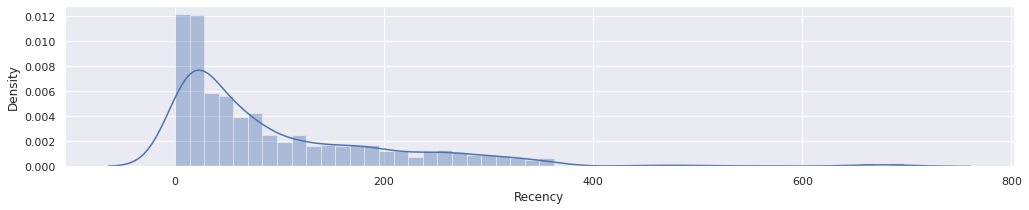

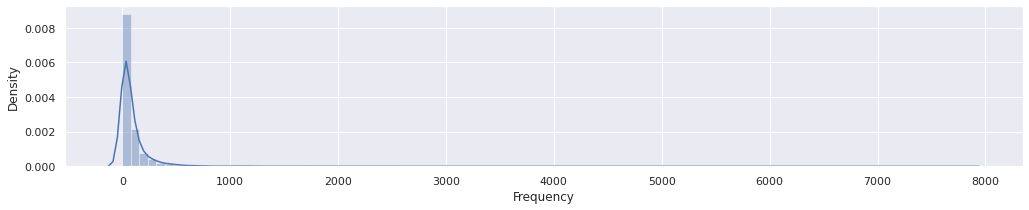

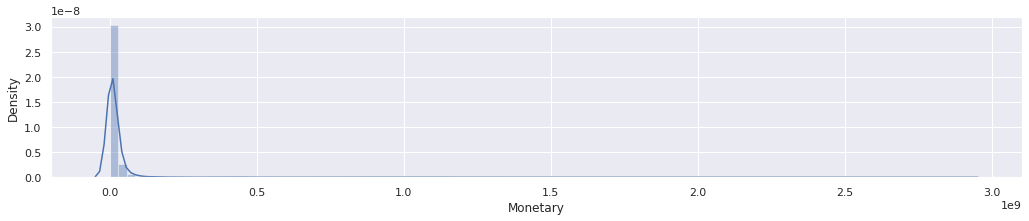

In [ ]:
plt.figure(figsize=(17,10))

# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(rfm_df['Recency'],bins=50 )
('\n')
plt.figure(figsize=(17.16,10))
# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(rfm_df['Frequency'],bins=100)

plt.figure(figsize=(17.4,10))
# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(rfm_df['Monetary'],bins=100)

# Show the plot
plt.show()

# Ranking Customer’s based upon their recency, frequency, and monetary score
# Here we are normalizing the rank of the customers within a company to analyze the ranking.

In [ ]:

rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,12346.0,326,2,1.832517e+09,4.176762,2.493138,2.493138
1,12347.0,40,182,3.034893e+07,59.766932,88.129003,88.129003
2,12348.0,76,31,2.890667e+07,41.686858,42.074565,42.074565
3,12349.0,19,73,7.792219e+06,77.189339,66.720037,66.720037
4,12350.0,311,17,2.432950e+06,5.399792,24.794145,24.794145


# **Calculating RFM score**
RFM score is calculated based upon recency, frequency, monetary value normalize ranks. Based upon this score we divide our customers. Here we rate them on a scale of 5. Formula used for calculating rfm score is : 0.15*Recency score + 0.28*Frequency score + 0.57 *Monetary score

In [ ]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['CustomerID', 'RFM_Score']].head(10)

,CustomerID,RFM_Score
0,12346.0,0.14
1,12347.0,4.19
2,12348.0,2.10
3,12349.0,3.41
4,12350.0,1.09
5,12352.0,3.45
6,12353.0,0.34
7,12354.0,2.66
8,12355.0,1.08
9,12356.0,3.12


 # **Rating Customer based upon the RFM score**
* rfm score >4.5 : Top Customer
* 4.5 > rfm score > 4 : High Value Customer
* 4>rfm score >3 : Medium value customer
* 3>rfm score>1.6 : Low-value customer
* rfm score<1.6 :Lost Customer

In [ ]:
#Rating customers on their rfm score
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers",

                            (np.where(rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                      
                            (np.where(rfm_df['RFM_Score'] > 3,
                                        "Medium Value Customer",
                                      
                             np.where(rfm_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))


rfm_df[['CustomerID', 'RFM_Score', 'Customer_segment']].head(10)

,CustomerID,RFM_Score,Customer_segment
0,12346.0,0.14,Lost Customers
1,12347.0,4.19,High value Customer
2,12348.0,2.10,Low Value Customers
3,12349.0,3.41,Medium Value Customer
4,12350.0,1.09,Lost Customers
5,12352.0,3.45,Medium Value Customer
6,12353.0,0.34,Lost Customers
7,12354.0,2.66,Low Value Customers
8,12355.0,1.08,Lost Customers
9,12356.0,3.12,Medium Value Customer


# **Visualizing the customer segments**
Here we will use a pie plot to display all segments of customers.

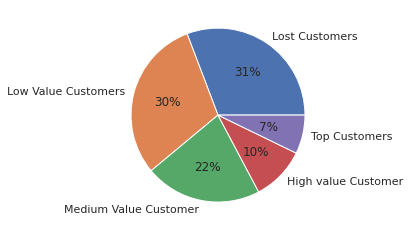

In [ ]:
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Revenue_Generated,ConvertedDate,R_rank,F_rank,M_rank,R_rank_norm,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12,2.55,17850.0,United Kingdom,15.30,01/12/2010,23573.5,NaN,NaN,5.794456,107100.0
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12,3.39,17850.0,United Kingdom,20.34,01/12/2010,23573.5,NaN,NaN,5.794456,107100.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12,2.75,17850.0,United Kingdom,22.00,01/12/2010,23573.5,NaN,NaN,5.794456,142800.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12,3.39,17850.0,United Kingdom,20.34,01/12/2010,23573.5,NaN,NaN,5.794456,107100.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12,3.39,17850.0,United Kingdom,20.34,01/12/2010,23573.5,NaN,NaN,5.794456,107100.0


# **Customer Lifetime Value**

**What keeps a customer coming back?**

Customers are gained and lost over the lifetime of any company, but a truly great product or service can keep customers well fed, yet still hungry for more—figuratively speaking. This appetite for more is what continuously adds value to the company over the span of their relationship with customers.

# What is Customer Lifetime Value?
Customer lifetime value (CLV), sometimes referred to as lifetime value (LTV), is the profit margin a company expects to earn over the entirety of their business relationship with the average customer.

The customer lifetime value must account for customer acquisition costs (CAC), ongoing sales and marketing expenses, operating expenses, and, of course, the cost required to manufacture the product and services the company is selling.  

Many companies take a short-sighted approach by overlooking this valuable metric and instead optimize for a single sale in the near term. It’s still important to find new customers for the growth of the company, but optimizing the lifetime value of existing customers is also essential for a company to sustain a viable business model. 

In fact, an increase in customer retention rates by only 5% has been found to increase profits anywhere from 25% to 95%.1 With this in mind, increasing the expected customer lifetime value is essential.

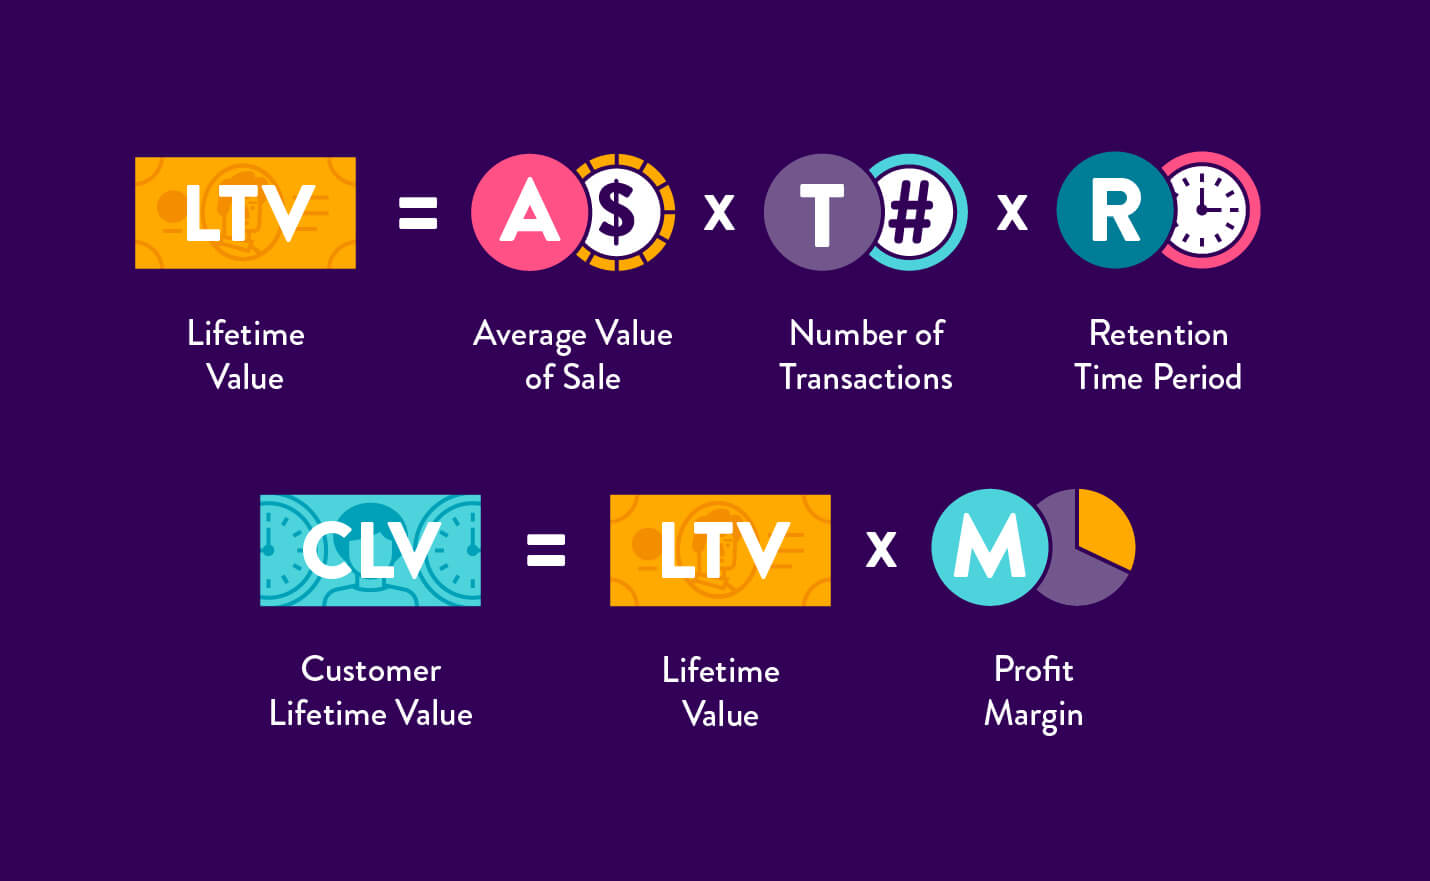

In [ ]:
pip install lifetimes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 584 kB 5.4 MB/s 


In [ ]:
import lifetimes
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from lifetimes import BetaGeoFitter # BG/NBD
from lifetimes import GammaGammaFitter # Gamma-Gamma Model
from lifetimes.plotting import plot_frequency_recency_matrix
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Data Science Files/Copy of Online Retail.xlsx')

In [ ]:
#Filtering Our Data

df = df[df['Quantity'] > 0 ] # exclude the orders with 0 value
df = df[df['UnitPrice'] > 0] # exclude the Unit Price with 0 value
df = df[~df['InvoiceNo'].str.contains("C",na=False)]  # C indicates the returned orders we don't want them as well

In [ ]:
df.dropna(inplace=True)  # inplace=True means we dropped them permanently

In [ ]:
#Handaling Outliers
def find_boundaries(df, variable,q1=0.05,q2=0.95):
# the boundaries are the quantiles
    lower_boundary = df[variable].quantile(q1) # lower quantile
    upper_boundary = df[variable].quantile(q2) # upper quantile
    return upper_boundary, lower_boundary


In [ ]:
def capping_outliers(df,variable):
    upper_boundary,lower_boundary =  find_boundaries(df,variable)
    df[variable] = np.where(df[variable] > upper_boundary, upper_boundary,
                       np.where(df[variable] < lower_boundary, lower_boundary, df[variable]))

In [ ]:
capping_outliers(df,'UnitPrice')
capping_outliers(df,'Quantity')

In [ ]:
df['Total Price'] = df['UnitPrice'] * df['Quantity']

In [ ]:
clv = lifetimes.utils.summary_data_from_transaction_data(df,'CustomerID','InvoiceDate','Total Price',observation_period_end='2011-12-09')

In [ ]:
clv.head()

,frequency,recency,T,monetary_value
CustomerID,,,,
12346.0,0.0,0.0,325.0,0.000000
12347.0,6.0,365.0,367.0,550.570000
12348.0,3.0,283.0,358.0,116.126667
12349.0,0.0,0.0,18.0,0.000000
12350.0,0.0,0.0,310.0,0.000000


In [ ]:
clv = clv[clv['frequency']>1] # we want only customers shopped more than 2 times

In [ ]:
bgf = BetaGeoFitter(penalizer_coef=0.1)
bgf.fit(clv['frequency'], clv['recency'], clv['T'])

<lifetimes.BetaGeoFitter: fitted with 4338 subjects, a: 0.00, alpha: 49.42, b: 0.00, r: 0.59>

In [ ]:
#Expected Number of Purchases within 6 Months
t = 180 # 30 day period
clv['expected_purc_6_months'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, clv['frequency'], clv['recency'], clv['T'])
clv.sort_values(by='expected_purc_6_months',ascending=False).head(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,frequency,recency,T,monetary_value,expected_purc_6_months
CustomerID,,,,,
14911.0,131.0,372.0,373.0,917.278855,56.073781
12748.0,112.0,373.0,373.0,257.314911,47.977630
17841.0,111.0,372.0,373.0,349.079640,47.551517
15311.0,89.0,373.0,373.0,421.881573,38.177026
14606.0,88.0,372.0,373.0,125.302955,37.750913


# **Gamma-Gamma Model**
After predicting the expected number of purchases of each customer. We need to use monetary value in order to predict CLV.

The Gamma Gamma model predicts the most likely value for each transaction.

Assumptions for Gamma-Gamma Model
In order to use the Gamma-Gamma model, we need to make sure that there is no correlation between frequency and monetary value.

In [ ]:
clv[['frequency','monetary_value']].corr()

,frequency,monetary_value
frequency,1.000000,0.291411
monetary_value,0.291411,1.000000


In [ ]:
clv['monetary_value'].abs().inplace = True

# Frequency/Recency analysis using the BG/NBD model
By using BetaGeoFitter, we will implement BG/NBD model to our new data frame and be able to predict the number of purchases for each customer.

# **Cohort Analysis**

Cohort Analysis is a very useful and relatively simple technique that helps in getting valuable insights about the behavior of any business’ customers/users. For the analysis, we can focus on different metrics (dependent on the business model) — conversion, retention, generated revenue, etc.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from operator import attrgetter
import matplotlib.colors as mcolors

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   InvoiceNo                406829 non-null  object        
 1   StockCode                406829 non-null  object        
 2   Description              406829 non-null  object        
 3   Quantity                 406829 non-null  int64         
 4   InvoiceDate              406829 non-null  datetime64[ns]
 5   UnitPrice                406829 non-null  float64       
 6   CustomerID               406829 non-null  float64       
 7   Country                  406829 non-null  object        
 8   Total_Revenue_Generated  406829 non-null  float64       
 9   ConvertedDate            406829 non-null  object        
 10  R_rank                   406829 non-null  float64       
 11  F_rank                   0 non-null       float64       
 12  M_rank          

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   InvoiceNo                406829 non-null  object        
 1   StockCode                406829 non-null  object        
 2   Description              406829 non-null  object        
 3   Quantity                 406829 non-null  int64         
 4   InvoiceDate              406829 non-null  datetime64[ns]
 5   UnitPrice                406829 non-null  float64       
 6   CustomerID               406829 non-null  float64       
 7   Country                  406829 non-null  object        
 8   Total_Revenue_Generated  406829 non-null  float64       
 9   ConvertedDate            406829 non-null  object        
 10  R_rank                   406829 non-null  float64       
 11  F_rank                   0 non-null       float64       
 12  M_rank          

In [ ]:
#we have to load data again 
df = pd.read_excel('/content/drive/MyDrive/Data Science Files/Copy of Online Retail.xlsx')
                   
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,3,"17,850",United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3,"17,850",United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,3,"17,850",United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3,"17,850",United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3,"17,850",United Kingdom


In [ ]:
#checking null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#As for the analysis, due to the fact that we need to have the customer IDs, we dropped all the rows without them.
df.dropna(subset=['CustomerID'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [ ]:
#We start by inspecting the distribution of the numeric variables — quantity and unit price.

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,"406,829",12,249,"-80,995",2,5,12,"80,995"
UnitPrice,"406,829",3,69,0,1,2,4,"38,970"
CustomerID,"406,829","15,288","1,714","12,346","13,953","15,152","16,791","18,287"


From the table above, we can see that there are orders with negative quantity — most likely returns. In total, there are around 9 thousand purchases with a negative quantity. We remove them from the dataset. This introduces a kind of bias, as we include the initial orders and remove the return — this way the initial order is taken into account even though in theory it was not realized and did not generate revenue. However, for simplicity, we leave the initial order, as for metric such as retention (indicating the customers’ engagement) this should still be a valid assumption.

Then, we calculate an aggregate metric indicating how many orders were placed by each customer.

In [ ]:
n_orders = df.groupby(['CustomerID'])['InvoiceNo'].nunique()
mult_orders_perc = np.sum(n_orders > 1) / df['CustomerID'].nunique()
print(f'{100 * mult_orders_perc:.2f}% of customers ordered more than once.')

69.97% of customers ordered more than once.


Using the code above, we can state that 69.97% of customers ordered more than once. This is already a valuable piece of information, as is seems that the customers are placing multiple orders. This means that there will be at least some retention. Given that the dataset has no sign-up/joined date, it would be problematic if the majority of the users only placed one order, but we will get back to it later.

Additionally, we look at the distribution of the number of orders per customer. For that, we can reuse the previously aggregated data (n_orders) and plot the data on a histogram.

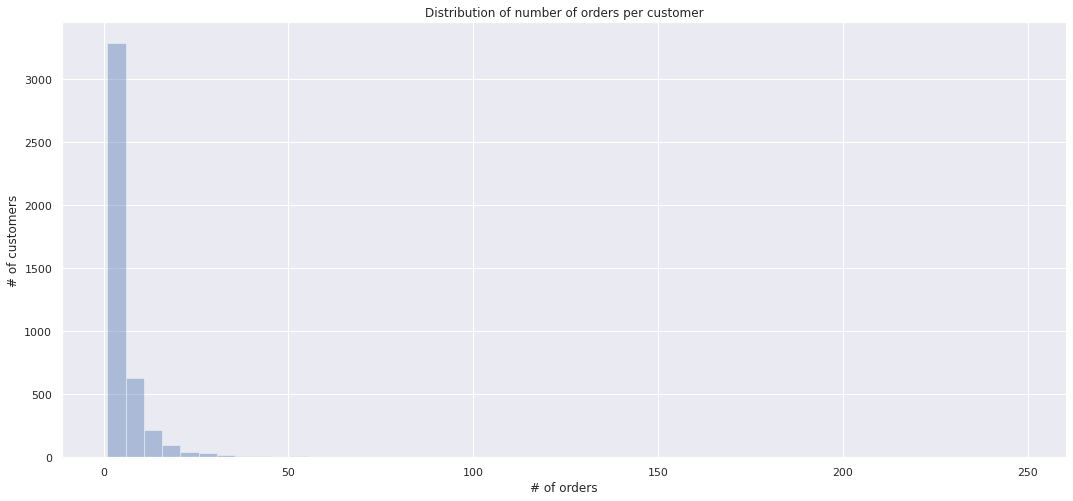

In [ ]:
from IPython.core.pylabtools import figsize
plt.figure(figsize=(18,8))
ax = sns.distplot(n_orders, kde=False, hist=True)
ax.set(title='Distribution of number of orders per customer',
       xlabel='# of orders', 
       ylabel='# of customers');

# **Cohort Analysis**
The dataset we are using for this example does not contain the customer sign-up date — the date when they registered with the retailer. That is why we assume that the cohort they belong to is based on the first purchase date. A possible downside of this approach is that the dataset does not contain the past data, and what we already see in this snapshot (between 01/12/2010 and 09/12/2011) includes recurring clients. In other words, the first purchase we see in this dataset might not be the actual first purchase of a given client. However, there is no way to account for this without having access to the entire historical dataset of the retailer.

As the first step, we keep only the relevant columns and drop duplicated values — one order (indicated by InvoiceNo) can contain multiple items (indicated by StockCode).

In [ ]:
df = df[['CustomerID', 'InvoiceNo', 'InvoiceDate']].drop_duplicates()

As the second step, we create the cohort and order_month variables. The first one indicates the monthly cohort based on the first purchase date (calculated per customer). The latter one is the truncated month of the purchase date.

In [ ]:
df['order_month'] = df['InvoiceDate'].dt.to_period('M')
df['cohort'] = df.groupby('CustomerID')['InvoiceDate'] \
                 .transform('min') \
                 .dt.to_period('M') 

In [ ]:
df.head()

,CustomerID,InvoiceNo,InvoiceDate,order_month,cohort
0,"17,850",536365,2010-12-01 08:26:00,2010-12,2010-12
7,"17,850",536366,2010-12-01 08:28:00,2010-12,2010-12
9,"13,047",536367,2010-12-01 08:34:00,2010-12,2010-12
21,"13,047",536368,2010-12-01 08:34:00,2010-12,2010-12
25,"13,047",536369,2010-12-01 08:35:00,2010-12,2010-12


Then, we aggregate the data per cohort and order_month and count the number of unique customers in each group. Additionally, we add the period_number, which indicates the number of periods between the cohort month and the month of the purchase.

In [ ]:
df_cohort = df.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('CustomerID', 'nunique')) \
              .reset_index(drop=False)
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))

The next step is to pivot the df_cohort table in a way that each row contains information about a given cohort and each column contains values for a certain period.



In [ ]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

To obtain the retention matrix, we need to divide the values each row by the row's first value, which is actually the cohort size — all customers who made their first purchase in the given month.

In [ ]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

Lastly, we plot the retention matrix as a heatmap. Additionally, we wanted to include extra information regarding the cohort size. That is why we in fact created two heatmaps, where the one indicating the cohort size is using a white only colormap — no coloring at all.

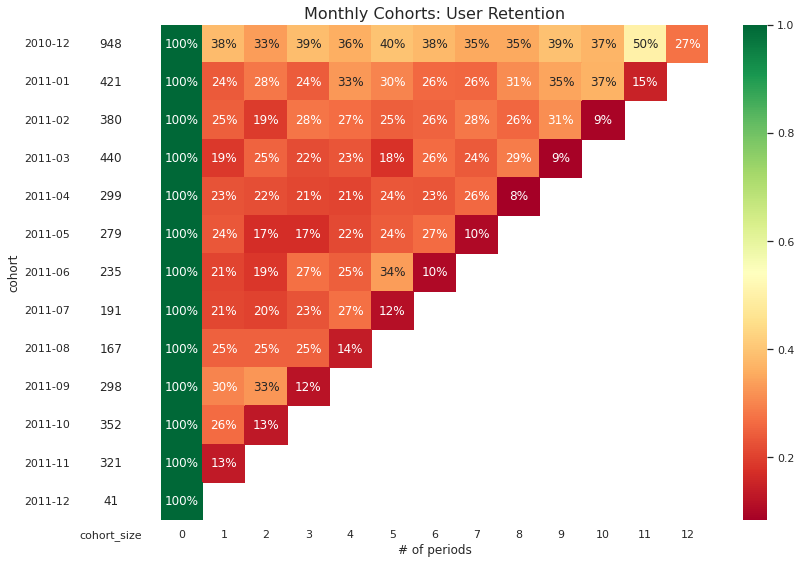

In [ ]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

# **Conclusions**

In the image, we can see that there is a sharp drop-off in the second month (indexed as 1) already, on average around 80% of customers do not make any purchase in the second month. The first cohort (2010–12) seems to be an exception and performs surprisingly well as compared to the other ones. A year after the first purchase, there is a 50% retention. This might be a cohort of dedicated customers, who first joined the platform based on some already-existing connections with the retailer. However, from data alone, that is very hard to accurately explain.

Throughout the matrix, we can see fluctuations in retention over time. This might be caused by the characteristics of the business, where clients do periodic purchases, followed by periods of inactivity.